In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.ensemble import ExtraTreesClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree._tree import TREE_LEAF
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

from IPython.display import HTML, display
from matplotlib import rcParams
from matplotlib import cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 13

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
DATA_PATH = '/content/drive/My Drive/cardiovascular_disease/data.csv'

<h1><b>Classification of Cardiovascular Disease</b></h1>

***

<h1>Introduction</h1>

<b>Cardiovascular disease</b> is the leading cause of death globally, and it is expected to cause more than 23.6 million fatalities a year by 2030 [1]. One’s survival from cardiovascular disease primarily depends on early detection and accurate diagnosis of the disease [2].

Machine Learning (ML) algorithms can be utilized to predict how likely one is to be diagnosed with cardiovascular disease, which can be used to improve the prevention rate and to provide critical insight for physicians to provide the correct treatment for the patient. In this project, we compare and contrast several ML algorithms for the prediction of cardiovascular disease, and analyze them to identify the factors that determine which algorithm is the best fit for our given dataset.


<h1>Methods</h1>

Heart Disease UCI has made its data available with information from 303 individuals [3]. The dataset provides basic features such as age and sex as well as features that are crucial to diagnosing cardiovascular diseases such as blood pressure, cholesterol levels, and blood sugar levels.

The data contains the following columns [4]:

- Age - age in years

- Ca - number of major vessels (0-3) colored by fluoroscopy
- Chol - serum cholesterol in mg/dl
- Cp - chest pain type (0=asymptomatic; 1=atypical angina; 2=non-anginal pain; 3=typical angina)

- Exang - exercise-induced angina (1=yes; 0=no)
- Fbs - fasting blood sugar > 120 mg/dl (1=true; 0=false)

- Oldpeak - ST depression induced by exercise relative to rest

- Restecg - resting electrocardiographic results (0=showing probable or definite left ventricular hypertrophy by Estes' criteria; 1=normal; 2=having ST-T wave abnormality)

- Sex - (1=male; 0=female)
- Slope - the slope of the peak exercise ST segment (0=downsloping; 1=flat; 2=upsloping)

- Thal - stands for Thalium, a radioactive tracer injected during a stress test (1=fixed defect; 2=normal; 3=reversable defect)
- Thalach - maximum heart rate achieved
- Trestbps - resting blood pressure (in mm Hg on admission to the hospital)

- <b>Target - have disease or not (1=yes; 0=no)</b>

Source: https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877

<b>The goal is to classify the binary class ‘target’, which indicates whether or not a patient has cardiovascular disease using unsupervised learning.<br>
A value of 0 indicates a patient with cardiovascular disease while a value of 1 indicates a patient without cardiovascular disease.</b>



<h1>Medical Jargons</h1>

- Angina - a condition marked by severe pain in the chest.

- ST depression - a finding on a electrocardiogram. There are multiple conditions associated with ST depression. Some of these include hypokalemia (low blood potassium) and cardiac ischemia (reduces blood flow to the heart and may cause chest pain). Therefore, ST depression indicates the abnormal electrical activity of a heart [5].

- Stress test - it is used to evaluate valvular heart disease or to diagnose heart rhythm disorders. "Reversible thallium defect" indicates that coronary stenosis is detected [6].


<h1><b>Exploratory Data Analysis</b></h1>

***

In [6]:
data = pd.read_csv(DATA_PATH)
data.shape

(303, 14)

In [7]:
for column in data.columns:
    print(column, data[column].unique())

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex [1 0]
cp [3 2 1 0]
trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs [1 0]
reste

<h1>Wrong Data</h1>

There are wrong data (ca=4 & thal=0), hence they are discarded!

In [8]:
data[data['ca'] == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [9]:
data[data['thal'] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [10]:
data = data.drop_duplicates()
data = data[data['ca'] != 4]
data = data[data['thal'] != 0]
data.shape

(296, 14)

In [11]:
for column in ['ca', 'thal']:
    print(column, data[column].unique())

ca [0 2 1 3]
thal [1 2 3]


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    int64  
 1   sex       296 non-null    int64  
 2   cp        296 non-null    int64  
 3   trestbps  296 non-null    int64  
 4   chol      296 non-null    int64  
 5   fbs       296 non-null    int64  
 6   restecg   296 non-null    int64  
 7   thalach   296 non-null    int64  
 8   exang     296 non-null    int64  
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    int64  
 11  ca        296 non-null    int64  
 12  thal      296 non-null    int64  
 13  target    296 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.7 KB


In [13]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,296.000000,296.000000,296.000000,296.00000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,0.679054,0.959459,131.60473,247.155405,0.14527,0.523649,149.560811,0.327703,1.059122,1.395270,0.679054,2.327703,0.540541
std,9.059471,0.467631,1.034184,17.72662,51.977011,0.35297,0.526692,22.970792,0.470171,1.166474,0.618235,0.939726,0.585743,0.499198
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.00000,211.000000,0.00000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,242.500000,0.00000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,275.250000,0.00000,1.000000,166.000000,1.000000,1.650000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [14]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<h1>Visualizing distributions and kernal density estimation (KDE)</h1>

KDE is used for visualizing the probability density at different values in a continuous variable.

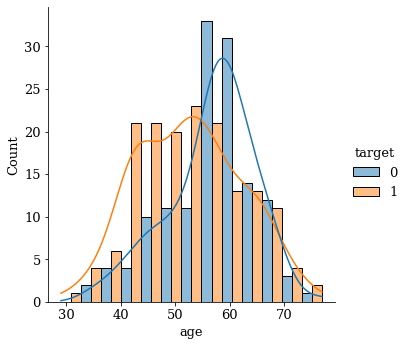

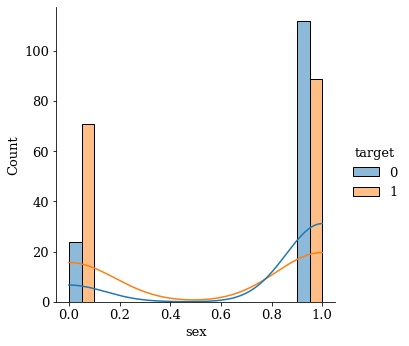

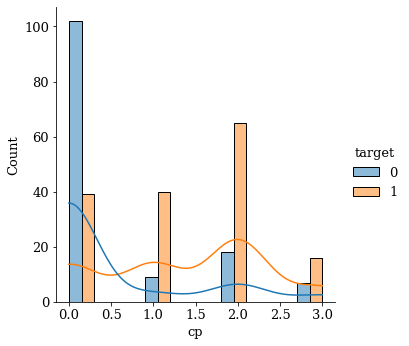

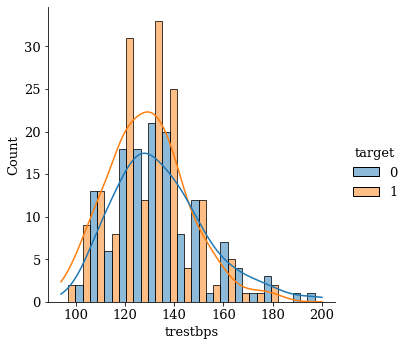

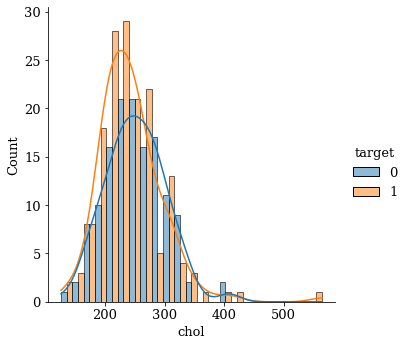

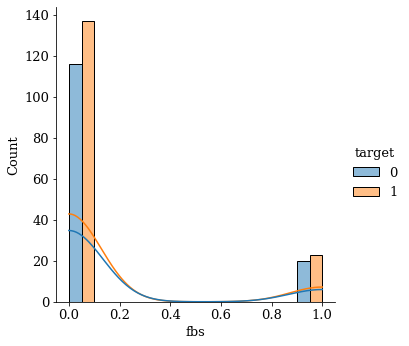

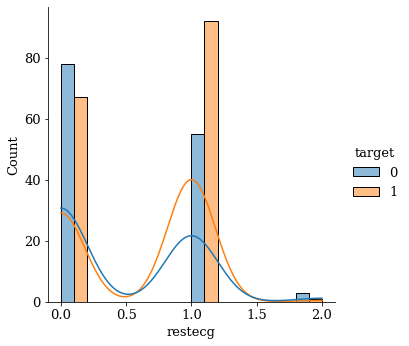

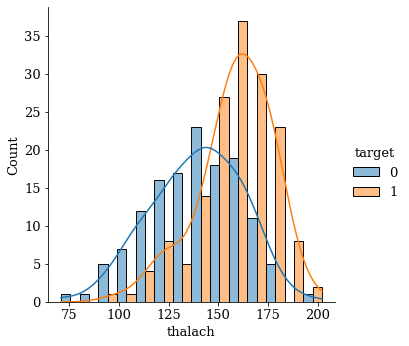

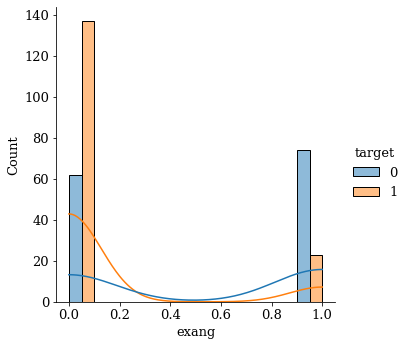

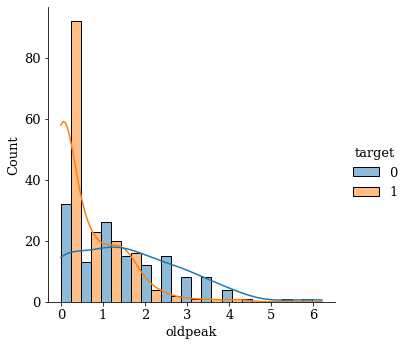

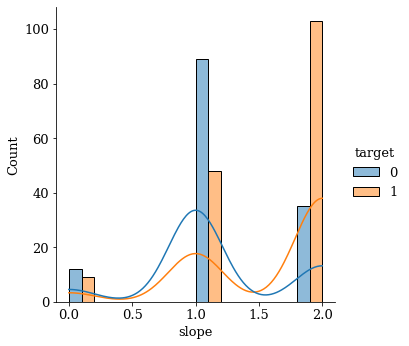

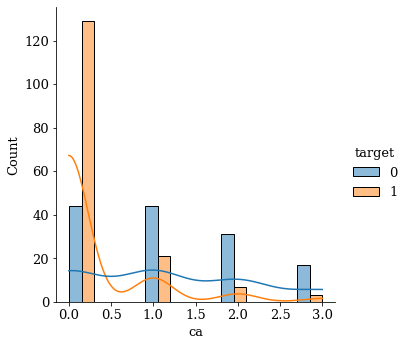

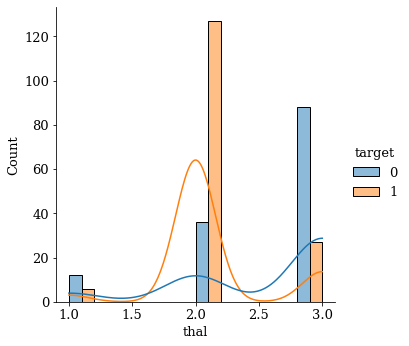

In [15]:

for i, column in enumerate(data.columns, 1):
  if column != 'target':
      sns.displot(data=data, x=column, hue='target', kde=True, multiple='dodge')
      # sns.displot(data=data, x=column, hue='target', kind='kde', fill=True)
      

<h1>Correlation heatmap of dataset variables</h1>

Based on the correlation heatmap below, the bottom-most row and right-most column depict the correlation of each factor with the target. From the correlation heat map, it is evident that <b>chest pain (cp) and maximum heart rate (thalach)</b> are the most <b>positively</b> correlated with the target, and <b> the number of major vessels (ca), exercise-induced chest pain (exang), and ST depression (oldpeak)</b> are the most <b>inversely</b> correlated with the target. To summarize, from the correlation heat map, the five features (cp, thalach, exang, oldpeak, and ca) depict the most correlation with the target result.

<h1>Making connections between medical research and our dataset</h1>

In order to better understand the dataset, we tried to match it with proven medical research. According to Mayo Clinic's research, chest pains, high blood pressure, high cholesterol, shortness of breath are among the most common risk factors [7]. We can see that <b>chest pain (cp) and increased heart rate (thalach) </b> are also important variable in our dataset. <b>ST depression (oldpeak)</b> also indicates anormalies in heart rate. 

Therefore, we were also able to find correlations of matches between our dataset and medical research to show accurate measures and validate the dataset.

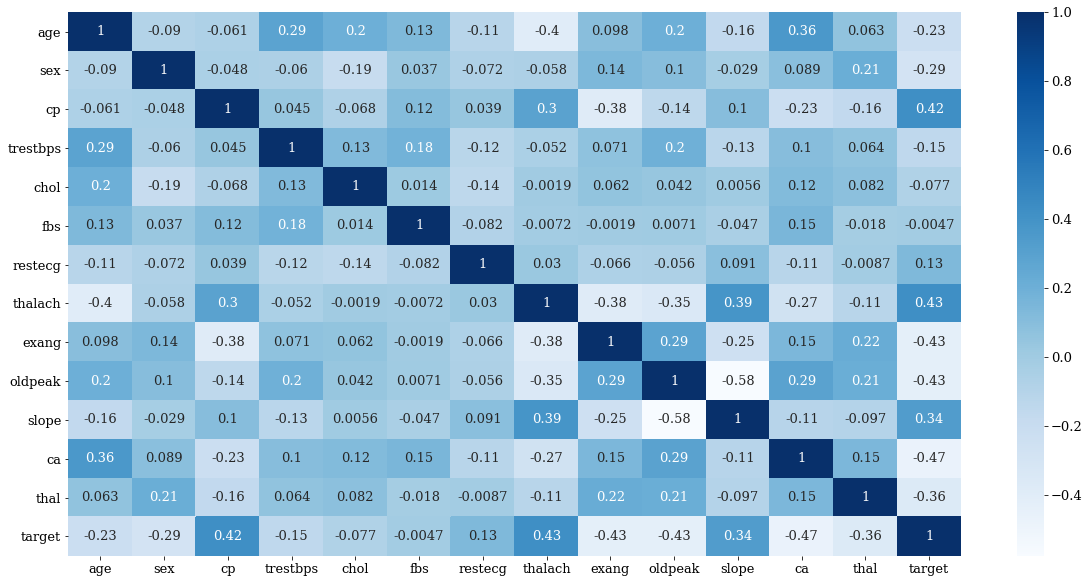

In [16]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='Blues')

<h1>Normalization & One-hot encoding </h1>

We normalized our raw data in order to convert our data to a common scale and thus prevent the models to be biased or sensitive towards the scale of the features.

In order to normalize our raw data, we processed it through a Standard scaler function from the scikit-learn library.

For categorical values, we converted the data to be one-hot encoded.

In [17]:
x = data.drop('target', axis=1)
y = data['target'].astype('uint8')

# onehot encoding
onehot_x = pd.get_dummies(x, columns=['sex', 'cp', 'exang', 'slope', 'ca', 'thal'])
onehot_x

scaler = StandardScaler()
scaled_x = scaler.fit_transform(onehot_x)
onehot_x

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,63,145,233,1,0,150,2.3,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0
1,37,130,250,0,1,187,3.5,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0
2,41,130,204,0,0,172,1.4,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
3,56,120,236,0,1,178,0.8,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
4,57,120,354,0,1,163,0.6,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,0,1,123,0.2,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
299,45,110,264,0,1,132,1.2,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1
300,68,144,193,1,1,141,3.4,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
301,57,130,131,0,1,115,1.2,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1


In [18]:
result = {}

In [19]:
def split_data(x, y):

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True, random_state=0)
  return x_train, x_test, y_train, y_test

In [20]:
def organize_report(report):

  # In binary classification,
  # recall of the positive class is also known as “sensitivity” & recall of the negative class is “specificity”
  new_report = {'accuracy': report['accuracy'],
            'npv': report['0']['precision'],
            'specificity': report['0']['recall'],
            'precision': report['1']['precision'],
            'sensitivity': report['1']['recall']}

  return new_report

In [21]:
def get_result(y_test, y_pred, dict_key, title):
  cm = confusion_matrix(y_test, y_pred)
  report = classification_report(y_true=y_test, y_pred=y_pred, output_dict=True)
  result[dict_key] = organize_report(report)
  fig = plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title(title)
  plt.plot()

  return result[dict_key]

<h1><b>Supervised Learning</b></h1>

***


<h1>Decision tree</h1>

None of the nodes (each category) is 100% "*yes* heart disease" or 100% "*no* heart disease", they are all considered "impure".

To determine which separation is best, we need a way to measure and compare "impurity".

There are many ways to measure impurity, but we used Gini impurity.

<b>Gini impurity</b> = 1 - (the probability of "yes")^2 - (the probability of "no")^2

When your leaf node has a different number of "yes or no" heart disease, 
the total Gini impurity for using a node, for example, chest pain (cp), to separate patients with and without heart disease is the <b>weighted average of the leaf node impurities</b>.

For example,
- Total Gini impurity for cp - total number of people in the node (cp=1) / the total number of all leaf nodes (cp=0-3) * Gini impurity of the node (cp=1)

The node that has the lowest impurity, which means it separates patients with and without heart disease the best. The node is selected as the root node.

<h1>Decision tree steps</h1>

1. Calculate all of the Gini impurity scores.

2. If the node itself has the lowest score, then there is no point in separating the patient anymore and it becomes a leaf node.

3. If separating the data results in an improvement, then pick the separation with the lowest impurity value for the next leaf node.

In [22]:
x_train, x_test, y_train, y_test = split_data(onehot_x, y)

scores = []
best_dt = None
best_features = None
best_num_features = 0
best_acc = 0
best_precision = 0

for i in range(1, len(onehot_x.columns) + 1):
  decision_tree = DecisionTreeClassifier(criterion='gini', max_features=i, random_state=0)
  
  decision_tree.fit(x_train, y_train)
  y_pred = decision_tree.predict(x_test)
  report = classification_report(y_true=y_test, y_pred=y_pred, output_dict=True)
  scores.append(report['accuracy'])

  if (best_acc < report['accuracy']) or (best_acc == report['accuracy'] and best_precision <= report['1']['precision']):
    best_acc = report['accuracy']
    best_precision = report['1']['precision']
    best_num_features = i
    best_dt = decision_tree
    best_features = decision_tree.feature_importances_

<h1>Changes in the number of maxium features</h1>

Increasing the number of features to consider when looking for the best split resulted in improvement in accuracy.

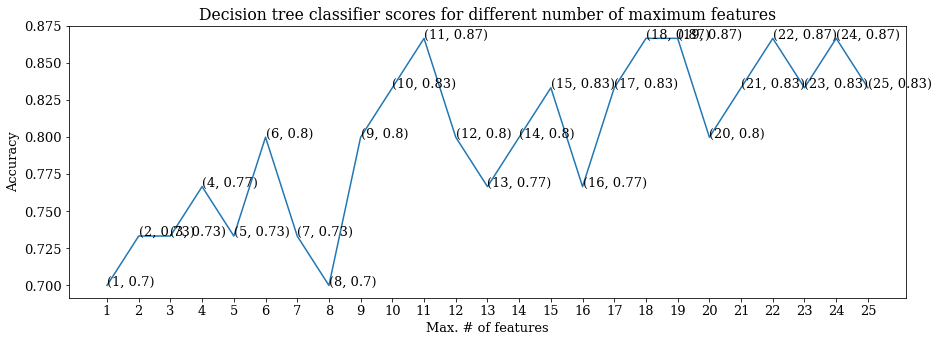

In [23]:
fig = plt.figure(figsize=(15, 5))
plt.plot([i for i in range(1, len(onehot_x.columns) + 1)], scores)

for i in range(1, len(onehot_x.columns)+1):
    plt.text(i, scores[i-1], (i, round(scores[i-1] , 2)))

plt.xticks([i for i in range(1, len(onehot_x.columns) + 1)])
plt.xlabel('Max. # of features')
plt.ylabel('Accuracy')
plt.title('Decision tree classifier scores for different number of maximum features')
plt.show()

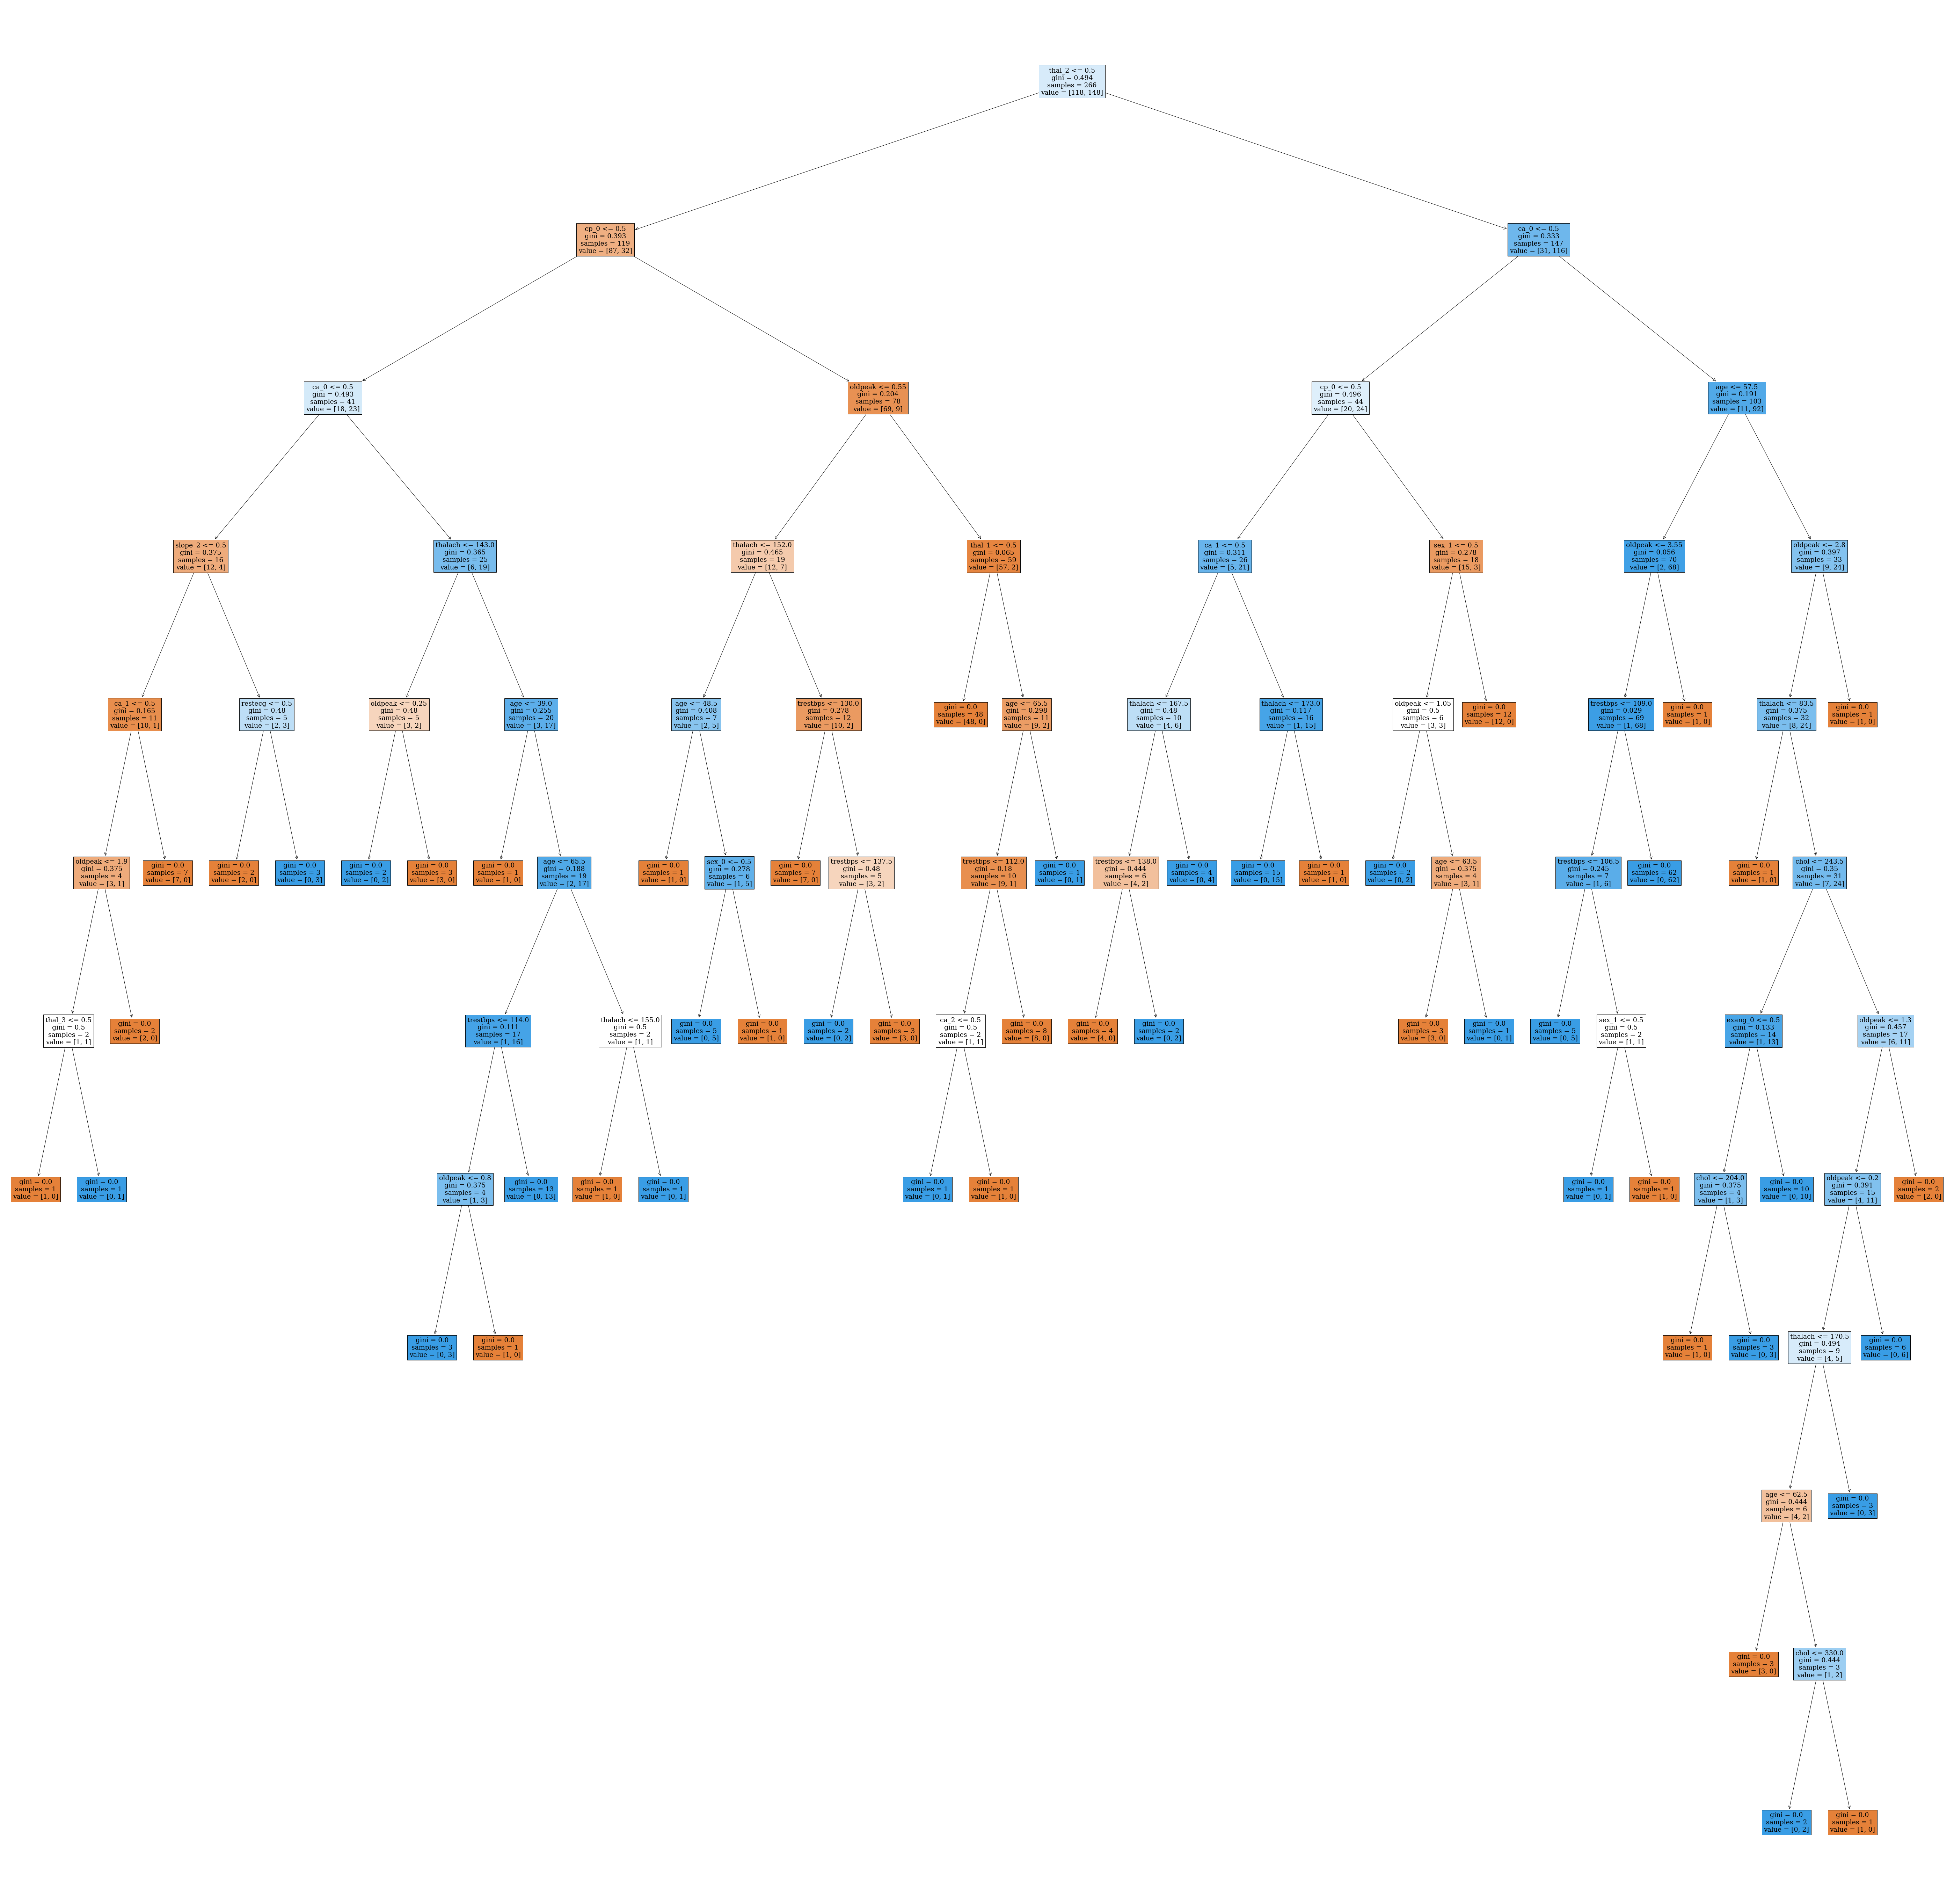

In [24]:
# https://mljar.com/blog/visualize-decision-tree/ & https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
fig = plt.figure(figsize=(100, 100))
_ = tree.plot_tree(best_dt, feature_names=onehot_x.columns, filled=True) 
plt.show()

<h1>Making connections between medical research and decision tree feature importance</h1>

Decision tree considered <b>reversible thallium defect (thal=2)</b> most important.  Reversible thallium defect indicates coronary stenosis where blood vessel supplying blood to the brain is narrowed. Thus, this is also an important feature for classifying cardiovascular disease.


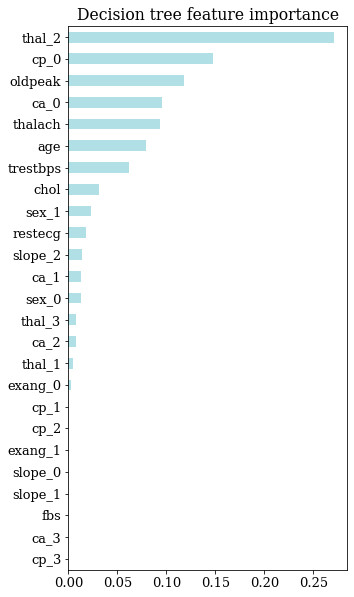

In [25]:
fig = plt.figure(figsize=(5,10))
feat_importances = pd.Series(best_features, index=onehot_x.columns)
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind='barh', color='powderblue')
plt.title('Decision tree feature importance')
plt.show()

<h1>Decision tree result</h1>

{'accuracy': 0.8666666666666667,
 'npv': 0.9375,
 'precision': 0.7857142857142857,
 'sensitivity': 0.9166666666666666,
 'specificity': 0.8333333333333334}

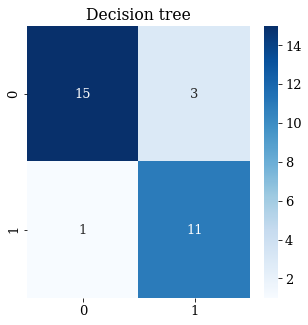

In [26]:
y_pred = best_dt.predict(x_test)
get_result(y_test, y_pred, 'decision_tree', 'Decision tree')

***
<h1>Post-pruning tree<h1>

The performance of a decision tree may be improved by pruning. <b>Pruning</b> involves removing the “branches” that are weak in providing classification. Thus, we tried to post-prune to see if it optimizes the model. Howeer, our result shows that it rather negatively affected performance.

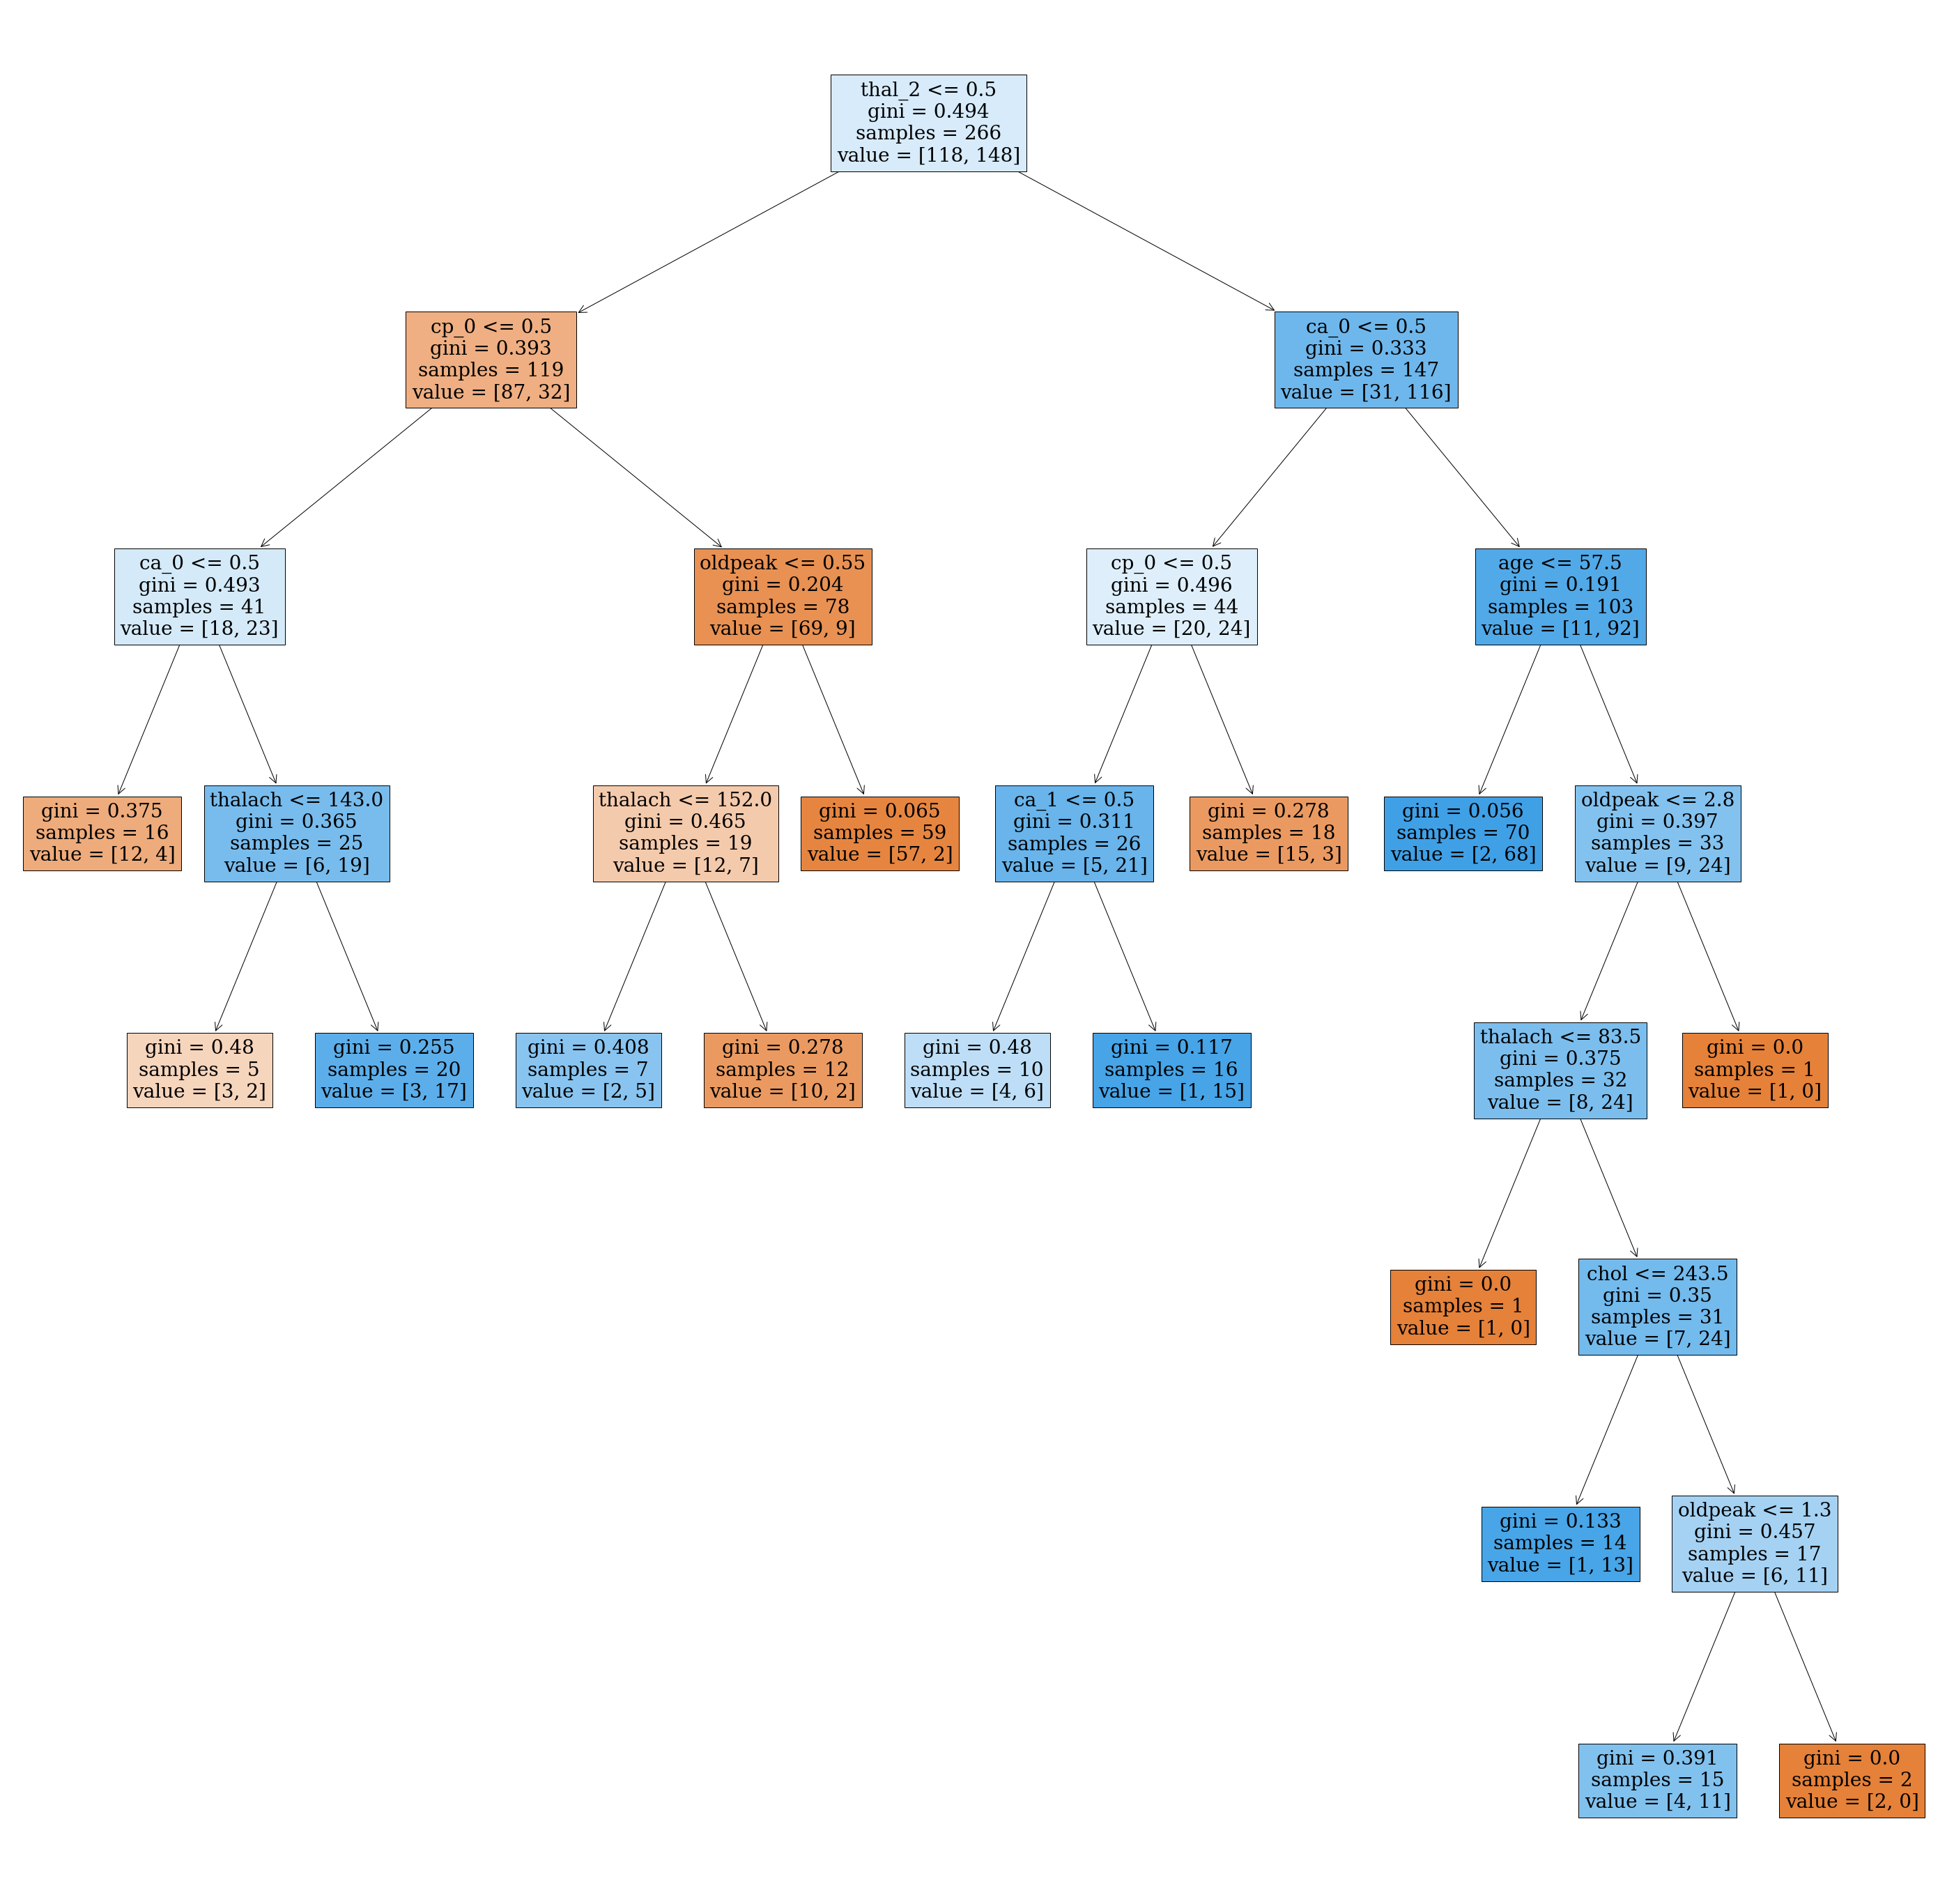

In [27]:

# https://stackoverflow.com/questions/49428469/pruning-decision-trees

def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
      # turn node into a leaf by "unlinking" its children
      inner_tree.children_left[index] = TREE_LEAF
      inner_tree.children_right[index] = TREE_LEAF
    # if there are children, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
      prune_index(inner_tree, inner_tree.children_left[index], threshold)
    if inner_tree.children_right[index] != TREE_LEAF:
      prune_index(inner_tree, inner_tree.children_right[index], threshold)

best_dt_prune = best_dt
prune_index(best_dt_prune.tree_, 0, 5)

fig = plt.figure(figsize=(50, 50))
tree.plot_tree(best_dt_prune, feature_names=onehot_x.columns, filled=True) # https://mljar.com/blog/visualize-decision-tree/
plt.show()

<h1>Post-pruning decision tree result</h1>

{'accuracy': 0.7666666666666667,
 'npv': 0.9230769230769231,
 'precision': 0.6470588235294118,
 'sensitivity': 0.9166666666666666,
 'specificity': 0.6666666666666666}

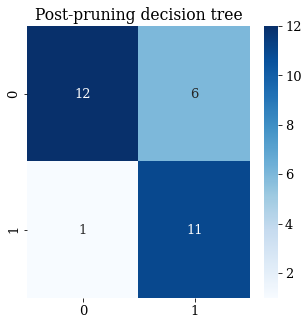

In [28]:
y_pred_post_prune = best_dt_prune.predict(x_test)
get_result(y_test, y_pred_post_prune, 'post_pruning_decision_tree', 'Post-pruning decision tree')

***
<h1>Random forest</h1>

Decision trees are not flexible when it comes to classifying new samples.

The good news is that Random Forests combine the simplicity of decision trees with flexibility resulting in a vast improvement in accuracy.

<h1>Random forest steps</h1>

1. Create a "bootstrapped" dataset.

2. Create a decision tree using the bootstrapped dataset, but only use a random subset of variables (or columns) at each step.

3. Go back to step 1 and repeat: make a new bootstrapped dataset and build a tree.

Using a bootstrapped sample and considering only a subset of the variables at each step results in a wide variety of trees.

A variety is what makes random forests more efficient than an individual decision tree.

In [29]:
x_train, x_test, y_train, y_test = split_data(onehot_x, y)
random_forest = RandomForestClassifier(bootstrap=True, max_features=best_num_features, random_state=0)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

<h1> Random forest result </h1>

Unlike our expectation, random forest performed slightly worse than the decision tree. This might be due to having a small test dataset.


{'accuracy': 0.8333333333333334,
 'npv': 0.9333333333333333,
 'precision': 0.7333333333333333,
 'sensitivity': 0.9166666666666666,
 'specificity': 0.7777777777777778}

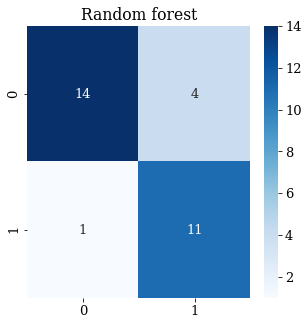

In [30]:
get_result(y_test, y_pred, 'radnom_forest', 'Random forest')

***
<h1>Support Vector Machine (SVM)</h1>

<b>SVM</b> is a supervised learning technique where labeled training data is used to generate an optimal hyperplane that separates the two classes and can categorize new testing data.

<h1>SVM steps</h1>

1. Find the "best soft margin" that successfully classify the two targets

2. The kernel function is used to systematically find Support Vector Classifiers in higher dimensions. (For our project, we used linear kernel.)


In [31]:
x_train, x_test, y_train, y_test = split_data(scaled_x, y)
svm = LinearSVC(random_state=0)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

<h1>SVM result</h1>

{'accuracy': 0.9,
 'npv': 1.0,
 'precision': 0.8,
 'sensitivity': 1.0,
 'specificity': 0.8333333333333334}

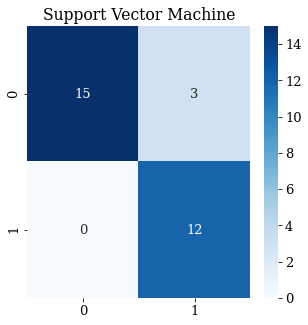

In [32]:
get_result(y_test, y_pred, 'svm', 'Support Vector Machine')

<h1>K-nearest neighbors (KNN)</h1>

KNN is a simple, easy-to-implement supervised machine learning algorithm which assumes that similar things exist in close proximity. In other words, similar things are near to each other.

<h1>KNN steps </h1>

1. Add a new data point with an unknown category. 

2. The datapoint is classified by looking at the "k-nearest neighbors". If k is greater than 1, a category that "gets the most votes" gets picked.


In [33]:
x_train, x_test, y_train, y_test = split_data(scaled_x, y)
scores = []
best_knn = None
best_num_neighbors = 0
best_acc = 0
best_precision = 0

for i in range(1, scaled_x.shape[1] + 1):
  knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  report = classification_report(y_true=y_test, y_pred=y_pred, output_dict=True)
  scores.append(report['accuracy'])

  if (best_acc < report['accuracy']) or (best_acc == report['accuracy'] and best_precision <= report['1']['precision']):
    best_acc = report['accuracy']
    best_precision = report['1']['precision']
    best_num_neighbors = i
    best_knn = knn

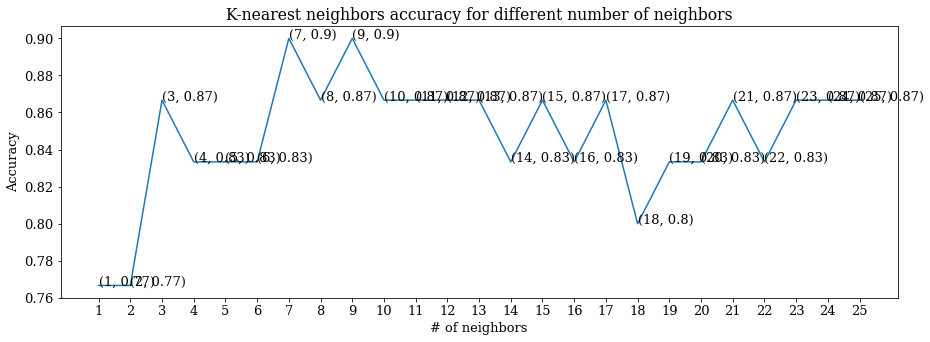

In [34]:
fig = plt.figure(figsize=(15, 5))
plt.plot([i for i in range(1, scaled_x.shape[1] + 1)], scores)

for i in range(1, scaled_x.shape[1] + 1):
    plt.text(i, scores[i-1], (i, round(scores[i-1] , 2)))

plt.xticks([i for i in range(1, scaled_x.shape[1] + 1)])
plt.xlabel('# of neighbors')
plt.ylabel('Accuracy')
plt.title('K-nearest neighbors accuracy for different number of neighbors')
plt.show()

<h1>KNN result</h1>

{'accuracy': 0.9,
 'npv': 1.0,
 'precision': 0.8,
 'sensitivity': 1.0,
 'specificity': 0.8333333333333334}

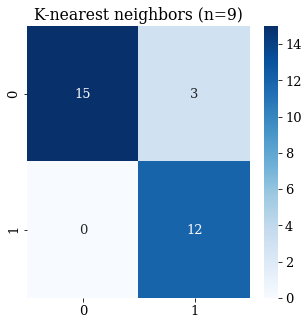

In [35]:
y_pred = best_knn.predict(x_test)
get_result(y_test, y_pred, 'knn', 'K-nearest neighbors (n=%d)'%(best_num_neighbors))

<h1><b>Unsupervised Learning</b></h1>

***


<h1>K-means</h1>

<b>K-means</b> is an unsupervised learning algorithm for clustering. This algorithm works by grouping some data points together in an unsupervised fashion. It groups observations with similar attribute values by measuring the Euclidean distance between points.

<h1>K-means algorithm steps</h1>

1. Choose a number of clusters, K.

2. Select random K points that are going to be the centroids for each cluster.

3. Assign each data point to the nearest centroid, doing so will enable us to create K number of clusters. 

4. Calculate a new centroid for each cluster.

5. Reassign each data point to the new closes centroid.

6. Go to step 4 and repeat.

<h1>Elbow method can be used to find out the best "k" for k-means algorithm</h1>

The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.

<em>We already know that we need 2 clusters for this dataset since the target value is binary (1=Heart disease; 0=No heart disease), however, we are still going to try the elbow method to see whether or not the elbow method correctly suggests 2 for the best "k".</em>

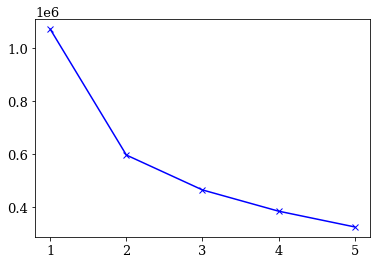

In [36]:
scores_x = []
scores_y = []
k = 5
for i in range(1, k + 1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(onehot_x)
    scores_x.append(i)
    scores_y.append(kmeans.inertia_)

plt.plot(scores_x, scores_y, 'bx-')

<h1>K-means intertia</h1>

<b>K-means intertia</b> is calculated as the sum of squared distance for each point to its closest centroid. Intuitively, inertia tells us how far away the points within a cluster are. Therefore, a small value of inertia is aimed for. The range of inertia’s value starts from zero and goes up.

<h1>Elbow method also shows that the best "k" is 2</h1>

As you can see in the graph below, using the elbow method, the best "k" for the k-means clustering algorithm is 2. Since we already know that we need two clusters (1=heart disease; 0=no heart disease), we can confirm that the k-means algorithm and the elbow method are showing a convincing result.

<h1>K-means result using k = 2</h1>

{'accuracy': 0.8344594594594594,
 'npv': 0.8041958041958042,
 'precision': 0.8627450980392157,
 'sensitivity': 0.825,
 'specificity': 0.8455882352941176}

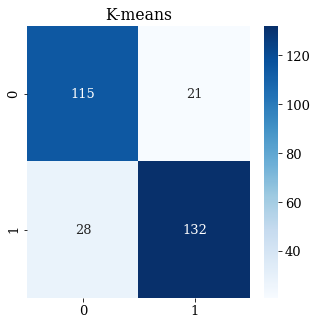

In [37]:
kmeans = KMeans(2)
kmeans.fit(scaled_x)
y_pred = kmeans.predict(scaled_x)

if (y_pred == np.logical_not(y)).mean() > (y_pred == y).mean():
  y_pred = np.logical_not(y_pred)

get_result(y, y_pred, 'kmeans', 'K-means')

In [38]:
kmeans.cluster_centers_.shape

(2, 25)

In [39]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=onehot_x.columns)
cluster_centers

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,-0.291322,-0.143864,-0.018992,-0.059844,0.097974,0.497122,-0.475086,0.306543,-0.306543,-0.521914,0.381117,0.306981,-0.070523,0.572844,-0.572844,-0.072676,-0.482566,0.519736,0.405536,-0.167325,-0.227469,-0.217112,-0.199759,0.640509,-0.555723
1,0.311694,0.153924,0.020320,0.064028,-0.104825,-0.531885,0.508309,-0.327979,0.327979,0.558412,-0.407769,-0.328449,0.075454,-0.612903,0.612903,0.077758,0.516312,-0.556081,-0.433895,0.179026,0.243376,0.232295,0.213728,-0.685300,0.594585


<h1>Inverse transform K-means result</h1>

In [40]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=onehot_x.columns)
cluster_centers = cluster_centers.sort_index(axis=1)
cluster_centers

,age,ca_0,ca_1,ca_2,ca_3,chol,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1,fbs,oldpeak,restecg,sex_0,sex_1,slope_0,slope_1,slope_2,thal_1,thal_2,thal_3,thalach,trestbps
0,51.888889,0.784314,0.150327,0.052288,0.013072,246.169935,0.215686,0.307190,0.418301,0.058824,0.941176,0.058824,0.124183,0.505882,0.575163,0.464052,0.535948,0.052288,0.222222,0.725490,0.013072,0.869281,0.117647,160.960784,129.058824
1,57.342657,0.370629,0.293706,0.209790,0.125874,248.209790,0.755245,0.013986,0.132867,0.097902,0.384615,0.615385,0.167832,1.651049,0.468531,0.167832,0.832168,0.090909,0.720280,0.188811,0.111888,0.209790,0.678322,137.363636,134.328671


In [41]:
groupby_dict = {}
for column in data.columns:
  if column != 'target':
    groupby_dict[column] = 'mean'

data_groupby = data.groupby('target').agg(groupby_dict)
data_groupby = data_groupby.sort_index(axis=1)
data_groupby

,age,ca,chol,cp,exang,fbs,oldpeak,restecg,sex,slope,thal,thalach,trestbps
target,,,,,,,,,,,,,
0,56.735294,1.154412,251.463235,0.485294,0.544118,0.147059,1.600735,0.448529,0.823529,1.169118,2.558824,138.948529,134.463235
1,52.643750,0.275000,243.493750,1.362500,0.143750,0.143750,0.598750,0.587500,0.556250,1.587500,2.131250,158.581250,129.175000


</h1>K-means result analysis</h1>

Using the inverse transformation for the k-means cluster centers, values for each category seem to match the mean values of the ground truth. Thus, K-means results seem reliable and prove the feasibility of using unsupervised learning for cardiovascular disease.



***
<h1>Principal component analysis (PCA)</h1>

<b>PCA</b> performs dimensionality reductions while attempting at keeping the original information unchanged. PCA works by trying to find a new set of features called components. Components are composites of the uncorrelated given input features.

Text(0, 0.5, 'Variance (%)')

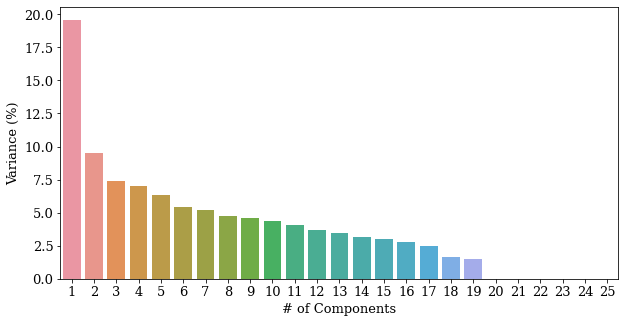

In [42]:
# for i in range(1, scaled_x.shape[1] + 1):
# x_train, x_test, y_train, y_test = split_data(scaled_x, y)

pca = PCA(random_state=0)
pca_x = pca.fit_transform(scaled_x)
plt.figure(figsize=(10, 5))
sns.barplot(x=np.array(range(pca.n_components_))+1, y=pca.explained_variance_ratio_ * 100)
plt.xlabel('# of Components')
plt.ylabel('Variance (%)')


<h1>Visualizing PCA result (2D)</h1>

In [43]:
pca_2d = pd.DataFrame(pca_x[:, :2], columns =['1st component','2nd component'])
pca_2d = pd.concat([pca_2d, pd.DataFrame({'target': y})], axis=1)
pca_2d.head()

,1st component,2nd component,target
0,0.729339,-1.105855,1.0
1,-1.565058,-1.114502,1.0
2,-3.296824,0.495312,1.0
3,-2.758946,-1.526611,1.0
4,-0.759842,1.871073,1.0


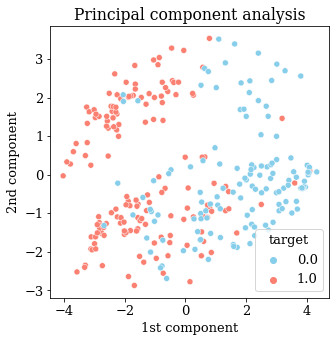

In [44]:
plt.figure(figsize=(5, 5))
ax = sns.scatterplot(x='1st component', y='2nd component', hue='target',
                     data=pca_2d, palette=['skyblue','salmon'])
plt.title('Principal component analysis')
plt.show()

<h1>Visualizing PCA result (3D)</h1>

Text(0.5, 0.92, 'Principal component analysis')

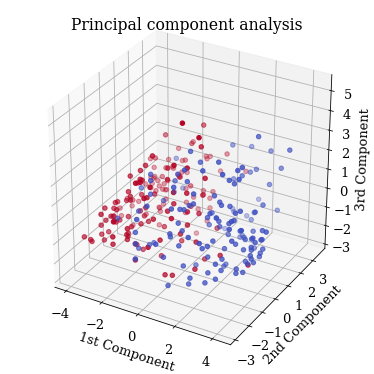

In [45]:
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)
ax.scatter(pca_x[:, 0],
           pca_x[:, 1],
           pca_x[:, 2],
           c=y, cmap=cm.coolwarm)
ax.set_xlabel('1st Component')
ax.set_ylabel('2nd Component')
ax.set_zlabel('3rd Component')
ax.set_title('Principal component analysis')

<h1>PCA + Random forest</h1>

Since the random forest was slightly worse than the decision tree, we wanted to explore if dimensionality reduction helps improve the performance of the random forest.

In [46]:
x_train, x_test, y_train, y_test = split_data(scaled_x, y)

In [47]:
pca = PCA(n_components=2, random_state=0)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

pca_random_forest = RandomForestClassifier(bootstrap=True, random_state=0)
pca_random_forest.fit(x_train, y_train)
y_pred = pca_random_forest.predict(x_test)

{'accuracy': 0.8666666666666667,
 'npv': 0.9375,
 'precision': 0.7857142857142857,
 'sensitivity': 0.9166666666666666,
 'specificity': 0.8333333333333334}

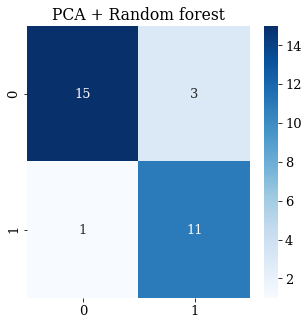

In [48]:
get_result(y_test, y_pred, 'pca_random_forest', 'PCA + Random forest')

<h1><b>Overall Results</b></h1>

***

For our project, it is especially paramount to correctly identify heart disease (target=1). Therefore, when comparing performances between different machine learning algorithms, we sorted the overall result by the precision value. Precision is true positive / (true positive + false positive). Surprisingly, an unsupervised learning algorithm, K-means, shows the best precision (86.3%). SVM and KNN present the second-highest precision value (80%) with the highest accuracy (90%).   

<b>Overall, the average accuracy across all different ML algorithms is 85%. Therefore, our study successfully validates the feasibility of ML-based cardiovascular disease classification.</b>


In [49]:
pd_result = pd.DataFrame(result).T

pd_result = pd_result.sort_values(by='precision', ascending=False)
pd_result.loc['average'] = pd_result.mean(axis=0)
pd_result

,accuracy,npv,specificity,precision,sensitivity
kmeans,0.834459,0.804196,0.845588,0.862745,0.825000
svm,0.900000,1.000000,0.833333,0.800000,1.000000
knn,0.900000,1.000000,0.833333,0.800000,1.000000
decision_tree,0.866667,0.937500,0.833333,0.785714,0.916667
pca_random_forest,0.866667,0.937500,0.833333,0.785714,0.916667
radnom_forest,0.833333,0.933333,0.777778,0.733333,0.916667
post_pruning_decision_tree,0.766667,0.923077,0.666667,0.647059,0.916667
average,0.852542,0.933658,0.803338,0.773509,0.927381


<h1>References</h1>

[1] World Health Organization (WHO). About Cardiovascular Diseases. Retrieved from https://www.who.int/cardiovascular_diseases/about_cvd/en/

[2] Mohan, S., Thirumalai, C., and Srivastava, G. (2019). Effective Heart Disease Prediction Using Hybrid Machine Learning Techniques. IEEE Access, 7, 81542-81554. DOI: https://doi.org/10.1109/ACCESS.2019.2923707

[3] UCI Machine Learnig Repository. Heart Disease Data Set. https://archive.ics.uci.edu/ml/datasets/heart+disease 

[4] Kaggle. Heart Disease UCI Discussion. https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877

[5] ScienceDirect. ST Segment Depression. https://www.sciencedirect.com/topics/medicine-and-dentistry/st-segment-depression

[6] Healio. Stress Testing Review. https://www.healio.com/cardiology/learn-the-heart/cardiology-review/topic-reviews/stress-testing-review 

[7] Mayo Clinic. Coronary Artery Disease. https://www.mayoclinic.org/diseases-conditions/coronary-artery-disease/symptoms-causes/syc-20350613?fbclid=IwAR1vuj1Re0t5CCxKahfVQZn1udRXqawquDE4AcCi-xB-WGJCG5BsKgF2ArU